[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/experimental/algos-and-libraries/bertopic/04_hdbscan_world.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/learn/experimental/algos-and-libraries/bertopic/04_hdbscan_world.ipynb)

# Clustering with HDBSCAN

Now that we've mapped our data to a lower dimensional space with UMAP, we can begin clustering with HDBSCAN.

We install the library via `pip install hdbscan`.

In [1]:
import hdbscan

clusterer = hdbscan.HDBSCAN()

Load the 2D Earth cities data.

In [2]:
import pandas as pd

geo = pd.read_csv('umapped.csv', sep='|')
geo.head()

,x,y,continent,country,city
0,18.177887,5.130468,Asia,Afghanistan,Kabul
1,18.704550,5.946643,Asia,Afghanistan,Kandahar
2,18.343416,4.389611,Asia,Afghanistan,Mazar-e Sharif
3,19.142778,5.550899,Asia,Afghanistan,Herat
4,17.825989,5.296687,Asia,Afghanistan,Jalalabad


Fit to the data with HDBSCAN.

In [3]:
geo_arr = geo[['x', 'y']].to_numpy()

In [4]:
geo_arr.shape

(9083, 2)

In [5]:
geo_arr[:2]

array([[18.177887 ,  5.1304684],
       [18.70455  ,  5.9466434]])

In [6]:
clustered = clusterer.fit(geo_arr)

Results are now stored in the `label_` attribute of the `clusterer`.

In [7]:
clusterer.labels_

array([ -1, 225, 227, ...,  -1,  76,  -1])

In [8]:
import plotly.express as px

fig = px.scatter(
    x=geo_arr[:,0], y=geo_arr[:,1],
    color=clusterer.labels_,
    custom_data=[geo['country'], geo['city']]
)
fig.update_traces(
    hovertemplate="\n".join([
        "city: %{customdata[1]}",
        "country: %{customdata[0]}"
    ])
)

We can view the condensed tree plot which shows the point drop off and also splitting of clusters as clustering parameters are shifted. This visualizes the process that has been used by HDBSCAN to identify clusters. At a high-level this is by identifying the cluster segments/roots with the largest area (those circled).

<AxesSubplot:ylabel='$\\lambda$ value'>

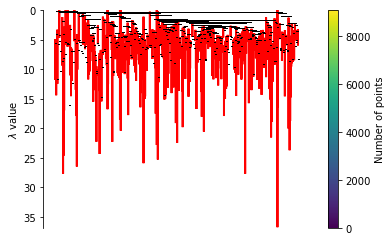

In [9]:
clusterer.condensed_tree_.plot(select_clusters=True)

In this case the algorithm has chosen tiny clusters, so small that we cannot even see the circled clusters in the condensed tree plot (those red lines are circles...). By default the minimum number of points to "create" a cluster is just `5`, given a dataset of ~10K points where we are aiming to produce ~6 continent clusters, this is very small.

We can therefore increase this `min_cluster_size` to return better results.

In [12]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
clusterer.fit(geo_arr)

colors = [str(x) for x in clusterer.labels_]

fig = px.scatter(
    x=geo_arr[:,0], y=geo_arr[:,1],
    color=colors,
    custom_data=[geo['city'], geo['country'], geo['continent']]
)
fig.update_traces(
    hovertemplate="<br>".join([
        "city: %{customdata[0]}",
        "country: %{customdata[1]}",
        "continent: %{customdata[2]}"
    ])
)

Already this looks much better, there is a clear distinction between most continents with the exception of Europe and Asia, which belong to the same landmass and are therefore more difficult to seperate. Interestingly, the outliers (`-1`) identified by HDBSCAN are all island nation, again this makes sense as they are more geographically isolated.

If we take a look at the condensed tree plot we can also see a clearer tree.

<AxesSubplot:ylabel='$\\lambda$ value'>

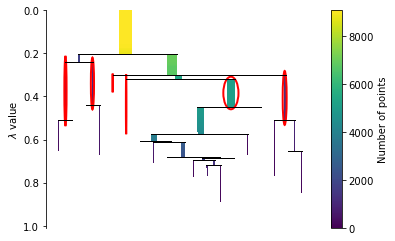

In [13]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [14]:
# save plotly clusters to html
fig.write_html("umap-hdbscan-earth-2d.html", include_plotlyjs="cdn", full_html=False)

When compared against no clustered data, it's cool and interesting to see how well the algorithm works.

In [15]:
fig = px.scatter(
    x=geo_arr[:,0], y=geo_arr[:,1],
    custom_data=[geo['country'], geo['city'], geo['continent']],
    color_discrete_sequence=[
        '#1c17ff'
    ]
)
fig.update_traces(
    hovertemplate="<br>".join([
        "city: %{customdata[1]}",
        "country: %{customdata[0]}",
        "continent: %{customdata[2]}"
    ])
)
fig.show()

In [ ]:
fig.write_html("umap-nocolor-earth-2d.html", include_plotlyjs="cdn", full_html=False)

---